# INF506 Methoden der Datenanalyse - ÜBUNG 12 - 06.12.2022

**190503029**\
**Deniz, Özdemirli**


Lesen Sie die Datendatei ein. Weisen Sie die Daten einem Pandas-Datenframe zu. 
Die Datei enthält gemessene Orte und Flächen von Sonnenfleckengruppen zwischen 1976 und 1996, für zwei aufeinanderfolgende Sonnenaktivitätszyklen. Die Orte sind nach Längen- und Breitengraden geordnet. 


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
path = './data2.txt'

In [ ]:
df = pd.read_csv(path,sep="\s+")

In [ ]:
df

,i,yr,mo,da,hr,mi,se,id,pr1,pr2,ua,ws,lat,lon,lcm,pa,dcen
0,g,1976,1,1,0,0,0,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
1,g,1976,12,31,23,59,59,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
2,g,1977,1,1,0,0,0,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
3,g,1976,1,12,12,11,35,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
4,g,1976,1,12,12,11,35,676,10,80,15,127,-11.45,284.27,-72.80,100.68,0.9537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57676,g,1996,12,22,8,10,0,8007a,0,6,0,3,-7.28,176.21,-11.77,115.09,0.2245
57677,g,1996,12,23,2,35,0,8004,9,49,16,90,5.77,251.93,73.95,276.56,0.9637
57678,g,1996,12,23,2,35,0,8007,2,11,2,13,5.18,240.00,62.02,276.89,0.8878
57679,g,1996,12,24,11,16,49,8008,1,5,1,3,-18.96,168.17,8.23,205.06,0.3212


**i**: Means that this data belong to sunspot *groups*, not to individual sunspots  
**yr, mo, da, hr, mi, se**: year, month, day, hour, minute, second  
**id**: ID number of the sunspot group  
**pr1, pr2**: Projected group-area quantities. Just ignore them for this task  
**ua**: Umbral area of sunspot group (umbra is the darkest central region of a sunspot)  
**ws**: Whole-spot area of sunspot group (in millionths of the visible solar hemispheric area)  
**lat**: Latitude (degrees)  
**lon**: Longitude (degrees)  
**lcm**: Longitudinal distance from the Sun's central meridian  
**pa**: Position angle (irrelevant now)  
**dcen**: Distance from the centre of Sun's disc measured in units of the solar radius

# Preprocessing steps

In [ ]:
df.loc[(df.se > 59),'se'] = 59

In [ ]:
# Eliminating missing data, which are indicated by 999999.
df = df[~(df == 999999).any(axis='columns')]

In [ ]:
# Filter according to lcm
#df.drop([df['lcm'] < 60].index, inplace=True)
df = df[np.abs(df.lcm) <= 70]

In [ ]:
# Clean zero-area groups
df = df[~(df.ws == 0)]
df = df[~(df.ua == 0)]

In [ ]:
df

,i,yr,mo,da,hr,mi,se,id,pr1,pr2,ua,ws,lat,lon,lcm,pa,dcen
0,g,1976,1,1,0,0,0,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
1,g,1976,12,31,23,59,59,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
2,g,1977,1,1,0,0,0,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
3,g,1976,1,12,12,11,35,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
6,g,1976,1,14,1,13,30,676,128,700,106,581,-10.25,283.47,-53.28,99.54,0.8006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57672,g,1996,12,21,5,57,0,8007,3,23,2,14,4.37,238.95,36.58,279.59,0.6050
57674,g,1996,12,22,8,10,0,8004,15,82,17,95,5.32,252.25,64.27,276.79,0.9052
57675,g,1996,12,22,8,10,0,8007,4,20,3,16,4.35,240.19,52.21,276.94,0.7959
57678,g,1996,12,23,2,35,0,8007,2,11,2,13,5.18,240.00,62.02,276.89,0.8878


In [ ]:
len(df.yr)

32697

Arrange each date and time element into a DateTime object. You can use [ datetime(...) ] directly within a for loop. 

In [ ]:
Data = [datetime(df.yr.iloc[i],df.mo.iloc[i],df.da.iloc[i],df.hr.iloc[i],df.mi.iloc[i],df.se.iloc[i]) for i in range(len(df))]

In [ ]:
Data

[datetime.datetime(1976, 1, 1, 0, 0),
 datetime.datetime(1976, 12, 31, 23, 59, 59),
 datetime.datetime(1977, 1, 1, 0, 0),
 datetime.datetime(1976, 1, 12, 12, 11, 35),
 datetime.datetime(1976, 1, 14, 1, 13, 30),
 datetime.datetime(1976, 1, 15, 10, 22, 2),
 datetime.datetime(1976, 1, 16, 8, 36, 22),
 datetime.datetime(1976, 1, 17, 0, 59),
 datetime.datetime(1976, 1, 18, 9, 44, 5),
 datetime.datetime(1976, 1, 19, 1, 25, 30),
 datetime.datetime(1976, 1, 20, 12, 24, 39),
 datetime.datetime(1976, 1, 21, 11, 57, 23),
 datetime.datetime(1976, 1, 22, 13, 27, 58),
 datetime.datetime(1976, 1, 23, 2, 1, 30),
 datetime.datetime(1976, 1, 27, 0, 38, 30),
 datetime.datetime(1976, 1, 30, 13, 37, 7),
 datetime.datetime(1976, 2, 13, 1, 13, 30),
 datetime.datetime(1976, 2, 14, 10, 22, 52),
 datetime.datetime(1976, 2, 15, 13, 25, 41),
 datetime.datetime(1976, 2, 16, 11, 22, 37),
 datetime.datetime(1976, 2, 17, 10, 36, 41),
 datetime.datetime(1976, 2, 18, 11, 0, 58),
 datetime.datetime(1976, 2, 18, 11, 0, 5

Insert this datetime as the column number 1. 

In [ ]:
df.insert(0,'date',Data)
df

,date,i,yr,mo,da,hr,mi,se,id,pr1,pr2,ua,ws,lat,lon,lcm,pa,dcen
0,1976-01-01 00:00:00,g,1976,1,1,0,0,0,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
1,1976-12-31 23:59:59,g,1976,12,31,23,59,59,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
2,1977-01-01 00:00:00,g,1977,1,1,0,0,0,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
3,1976-01-12 12:11:35,g,1976,1,12,12,11,35,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
6,1976-01-14 01:13:30,g,1976,1,14,1,13,30,676,128,700,106,581,-10.25,283.47,-53.28,99.54,0.8006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57672,1996-12-21 05:57:00,g,1996,12,21,5,57,0,8007,3,23,2,14,4.37,238.95,36.58,279.59,0.6050
57674,1996-12-22 08:10:00,g,1996,12,22,8,10,0,8004,15,82,17,95,5.32,252.25,64.27,276.79,0.9052
57675,1996-12-22 08:10:00,g,1996,12,22,8,10,0,8007,4,20,3,16,4.35,240.19,52.21,276.94,0.7959
57678,1996-12-23 02:35:00,g,1996,12,23,2,35,0,8007,2,11,2,13,5.18,240.00,62.02,276.89,0.8878


Set this datetime column as the index column.

In [ ]:
df = df.set_index('date')

In [ ]:
df = df.drop(columns=['yr', 'mo','da','hr','mi','se'])

Drop the redundant date and time columns (yr, mo, da, ...)

In [ ]:
df

,i,id,pr1,pr2,ua,ws,lat,lon,lcm,pa,dcen
date,,,,,,,,,,,
1976-01-01 00:00:00,g,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
1976-12-31 23:59:59,g,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
1977-01-01 00:00:00,g,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
1976-01-12 12:11:35,g,675,4,9,3,5,-8.40,33.95,36.89,261.68,0.6024
1976-01-14 01:13:30,g,676,128,700,106,581,-10.25,283.47,-53.28,99.54,0.8006
...,...,...,...,...,...,...,...,...,...,...,...
1996-12-21 05:57:00,g,8007,3,23,2,14,4.37,238.95,36.58,279.59,0.6050
1996-12-22 08:10:00,g,8004,15,82,17,95,5.32,252.25,64.27,276.79,0.9052
1996-12-22 08:10:00,g,8007,4,20,3,16,4.35,240.19,52.21,276.94,0.7959


Take the absolute value of the latitude (lat) column and insert this as a new column, to the left side of lat. 

In [ ]:
abs = [np.abs(df.lat.iloc[i]) for i in range(len(df))]
abs

[8.4,
 8.4,
 8.4,
 8.4,
 10.25,
 11.21,
 11.12,
 11.17,
 11.36,
 12.04,
 12.07,
 12.05,
 11.97,
 12.86,
 5.01,
 3.69,
 12.16,
 11.2,
 11.38,
 10.98,
 10.69,
 11.04,
 2.91,
 3.19,
 2.92,
 3.63,
 34.59,
 34.09,
 34.67,
 34.97,
 11.3,
 10.27,
 4.55,
 4.59,
 7.55,
 4.74,
 7.32,
 4.45,
 7.37,
 3.88,
 3.95,
 3.96,
 5.29,
 7.43,
 6.53,
 8.87,
 7.6,
 6.32,
 8.29,
 7.64,
 6.03,
 7.71,
 5.64,
 7.8,
 7.89,
 7.95,
 7.75,
 7.8,
 7.73,
 3.42,
 3.21,
 2.1,
 3.24,
 2.99,
 3.06,
 2.81,
 4.42,
 2.73,
 4.61,
 2.67,
 4.79,
 9.17,
 2.39,
 4.61,
 9.89,
 2.21,
 4.76,
 9.6,
 4.82,
 9.23,
 4.7,
 4.82,
 9.36,
 4.88,
 9.83,
 4.86,
 9.61,
 9.68,
 2.39,
 9.92,
 2.88,
 9.95,
 2.69,
 9.88,
 2.26,
 8.77,
 8.74,
 8.8,
 9.29,
 9.23,
 0.57,
 0.21,
 0.25,
 0.39,
 0.19,
 0.06,
 6.33,
 0.04,
 5.6,
 0.05,
 6.71,
 9.86,
 10.16,
 0.77,
 9.9,
 0.85,
 6.73,
 7.0,
 5.54,
 8.7,
 10.04,
 9.14,
 9.04,
 24.44,
 25.1,
 45.13,
 45.51,
 34.35,
 3.13,
 3.0,
 2.64,
 2.7,
 2.66,
 2.72,
 1.62,
 2.8,
 1.19,
 3.17,
 1.38,
 26.64,
 1.3,
 26.7

In [ ]:
df.insert(6,'abs',abs)

In [ ]:
df

,i,id,pr1,pr2,ua,ws,abs,lat,lon,lcm,pa,dcen
date,,,,,,,,,,,,
1976-01-01 00:00:00,g,675,4,9,3,5,8.40,-8.40,33.95,36.89,261.68,0.6024
1976-12-31 23:59:59,g,675,4,9,3,5,8.40,-8.40,33.95,36.89,261.68,0.6024
1977-01-01 00:00:00,g,675,4,9,3,5,8.40,-8.40,33.95,36.89,261.68,0.6024
1976-01-12 12:11:35,g,675,4,9,3,5,8.40,-8.40,33.95,36.89,261.68,0.6024
1976-01-14 01:13:30,g,676,128,700,106,581,10.25,-10.25,283.47,-53.28,99.54,0.8006
...,...,...,...,...,...,...,...,...,...,...,...,...
1996-12-21 05:57:00,g,8007,3,23,2,14,4.37,4.37,238.95,36.58,279.59,0.6050
1996-12-22 08:10:00,g,8004,15,82,17,95,5.32,5.32,252.25,64.27,276.79,0.9052
1996-12-22 08:10:00,g,8007,4,20,3,16,4.35,4.35,240.19,52.21,276.94,0.7959


- Scatter-plot absolute-value of sunspot group latitude (you created above). 
- Resample this quantity in time, with 1-year intervals, taking the mean over each bin. 
- Plot 1-year-averaged latitudes you produced. 
- Plot errorbars that show the standard deviation. 
- On a duplicate scatter-plot with resampled data, plot errorbars that show standard deviation of the mean (check wikipedia for this, if you don't know). 

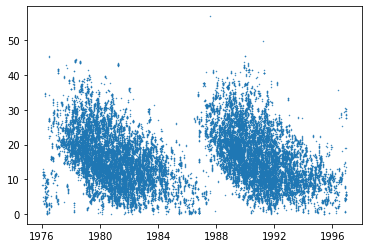

In [ ]:
plt.scatter(df.index,df['abs'],s = 0.2)

In [ ]:
df['abs']

date
1976-01-01 00:00:00     8.40
1976-12-31 23:59:59     8.40
1977-01-01 00:00:00     8.40
1976-01-12 12:11:35     8.40
1976-01-14 01:13:30    10.25
                       ...  
1996-12-21 05:57:00     4.37
1996-12-22 08:10:00     5.32
1996-12-22 08:10:00     4.35
1996-12-23 02:35:00     5.18
1996-12-24 11:16:49    18.96
Name: abs, Length: 32697, dtype: float64

In [ ]:
c = pd.Series(np.array(df['abs']),index = df.index)
c

date
1976-01-01 00:00:00     8.40
1976-12-31 23:59:59     8.40
1977-01-01 00:00:00     8.40
1976-01-12 12:11:35     8.40
1976-01-14 01:13:30    10.25
                       ...  
1996-12-21 05:57:00     4.37
1996-12-22 08:10:00     5.32
1996-12-22 08:10:00     4.35
1996-12-23 02:35:00     5.18
1996-12-24 11:16:49    18.96
Length: 32697, dtype: float64

In [ ]:
c = c.resample("Y").mean()
c

date
1976-12-31    13.551263
1977-12-31    22.084758
1978-12-31    21.342727
1979-12-31    18.283740
1980-12-31    16.050085
1981-12-31    13.631877
1982-12-31    12.277403
1983-12-31    12.681149
1984-12-31    11.091400
1985-12-31     8.898377
1986-12-31    10.488603
1987-12-31    24.209576
1988-12-31    21.954519
1989-12-31    19.499364
1990-12-31    17.111704
1991-12-31    14.589062
1992-12-31    12.984868
1993-12-31    11.613688
1994-12-31    10.043320
1995-12-31     9.897238
1996-12-31     9.679548
Freq: A-DEC, dtype: float64

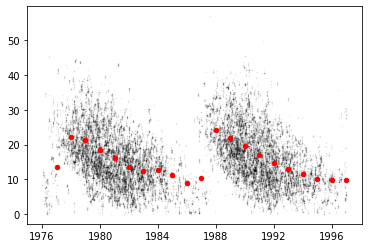

In [ ]:
plt.scatter(df.index,df['abs'],s = 0.2,c= 'black',alpha = 0.1)
plt.scatter(c.index, c,s = 20,c='red')

In [ ]:
e = pd.Series(np.array(df['abs']),index = df.index)
d = e.resample("Y").std()
d

date
1976-12-31     9.746413
1977-12-31     6.368392
1978-12-31     6.689896
1979-12-31     7.378116
1980-12-31     7.072644
1981-12-31     6.511074
1982-12-31     5.839704
1983-12-31     5.682539
1984-12-31     4.329891
1985-12-31     4.966813
1986-12-31    10.491839
1987-12-31     8.074396
1988-12-31     6.460602
1989-12-31     6.665567
1990-12-31     7.920368
1991-12-31     7.221985
1992-12-31     5.993044
1993-12-31     5.121965
1994-12-31     4.093632
1995-12-31     4.561350
1996-12-31     6.988213
Freq: A-DEC, dtype: float64

<ErrorbarContainer object of 3 artists>

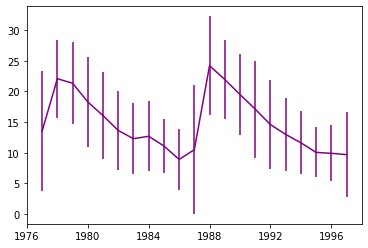

In [ ]:
plt.errorbar(c.index, c,yerr = d,c='purple')

<ErrorbarContainer object of 3 artists>

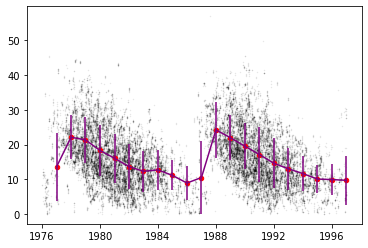

In [ ]:
plt.scatter(df.index,df['abs'],s = 0.2,c= 'black',alpha = 0.1)
plt.scatter(c.index, c,s = 20,c='red')
plt.errorbar(c.index, c,yerr = d,c='purple')

- Scatter-plot sunspot group area (ws)
- Calculate rolling maxima with a 1-year window (or 365 days). 

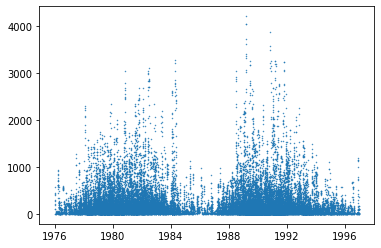

In [ ]:
b = plt.scatter(df.date,df['ws'],s = 0.2)

In [ ]:
pd.DataFrame(df['ws'].rolling(365).max())

,ws
date,
1976-01-01 00:00:00,NaN
1976-12-31 23:59:59,NaN
1977-01-01 00:00:00,NaN
1976-01-12 12:11:35,NaN
1976-01-14 01:13:30,NaN
...,...
1996-12-21 05:57:00,1199.0
1996-12-22 08:10:00,1199.0
1996-12-22 08:10:00,1199.0


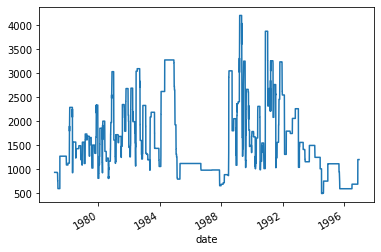

In [ ]:
df['ws'].rolling(365).max().plot()